<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/modified_text_modifications_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis for Modifications

This notebook guides you through the process of comparing text data across multiple CSV files to identify changes, calculate statistics on these changes, and visualize the data for easy interpretation.


In [20]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.5 MB/s eta 0:00:00


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import difflib
import seaborn as sns
from collections import Counter
import numpy as np
import Levenshtein
from wordcloud import WordCloud

## Setup and Data Loading

Define functions for loading CSV files and preparing the data.


In [2]:

def load_csv_data(file_path):
    return pd.read_csv(file_path)


## Data Analysis

Calculate total modifications, words added, and words removed for each CSV file.


In [3]:
def calculate_modifications(df):
    df['Original Word Count'] = df['Original'].apply(lambda x: len(str(x).split()))
    df['Modified Word Count'] = df['Modified'].apply(lambda x: len(str(x).split()))
    total_modifications = len(df)
    words_added = sum(df['Modified Word Count'] - df['Original Word Count'])
    words_removed = sum(df['Original Word Count'] - df['Modified Word Count'])
    return total_modifications, words_added, words_removed


## Data Visualization

Visualize the results with graphs for better insights.


## Detailed Text Comparisons

This section performs detailed text comparisons to identify specific words and symbols that were modified, deleted, or added during the cleaning process.


In [43]:
def compare_texts(df):
    changes = {'added': [], 'deleted': []}

    for _, row in df.iterrows():
        original = row['Original']
        modified = row['Modified']
        diff = difflib.ndiff(original.split(), modified.split())

        for change in diff:
            if change.startswith('+ '):
                changes['added'].append(change[2:])
            elif change.startswith('- '):
                changes['deleted'].append(change[2:])

    return changes

def visualize_changes(changes):
    # WordCloud for added words
    added_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(changes['added']))
    plt.figure(figsize=(10, 5))
    plt.imshow(added_wordcloud, interpolation='bilinear')
    plt.title('Added Words WordCloud')
    plt.axis('off')
    plt.show()

    # WordCloud for deleted words
    deleted_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(changes['deleted']))
    plt.figure(figsize=(10, 5))
    plt.imshow(deleted_wordcloud, interpolation='bilinear')
    plt.title('Deleted Words WordCloud')
    plt.axis('off')
    plt.show()

    # Bar plot for most common added words
    added_word_counts = Counter(changes['added'])
    most_added = added_word_counts.most_common(10)
    plt.figure(figsize=(12, 6))
    plt.bar(*zip(*most_added), color='skyblue')
    plt.title('Most Common Added Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Bar plot for most common deleted words
    deleted_word_counts = Counter(changes['deleted'])
    most_deleted = deleted_word_counts.most_common(10)
    plt.figure(figsize=(12, 6))
    plt.bar(*zip(*most_deleted), color='lightcoral')
    plt.title('Most Common Deleted Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

from collections import Counter

# Function to calculate statistics based on text comparisons
def calculate_text_statistics(changes):
    added_words = changes['added']
    deleted_words = changes['deleted']

    added_word_count = len(added_words)
    deleted_word_count = len(deleted_words)

    # Count occurrences of each added word
    added_word_freq = Counter(added_words)

    # Count occurrences of each deleted word
    deleted_word_freq = Counter(deleted_words)

    return added_word_count, deleted_word_count, added_word_freq, deleted_word_freq

# Example usage:
# changes = compare_texts(df)
# added_word_count, deleted_word_count, added_word_freq, deleted_word_freq = calculate_text_statistics(changes)
# print("Added Word Count:", added_word_count)
# print("Deleted Word Count:", deleted_word_count)
# print("Added Word Frequencies:", added_word_freq)
# print("Deleted Word Frequencies:", deleted_word_freq)



In [55]:

# Function to visualize word counts
def visualize_word_counts(added_word_count, deleted_word_count):
    labels = ['Added Words', 'Deleted Words']
    counts = [added_word_count, deleted_word_count]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['lightgreen', 'lightcoral'])
    plt.xlabel('Word Type')
    plt.ylabel('Count')
    plt.title('Added vs Deleted Word Counts')
    plt.show()

# Function to visualize word frequencies
def visualize_word_frequencies(added_word_freq, deleted_word_freq):
    added_words, added_counts = zip(*added_word_freq.items())
    deleted_words, deleted_counts = zip(*deleted_word_freq.items())

    plt.figure(figsize=(12, 6))
    plt.bar(added_words, added_counts, color='lightgreen', label='Added Words')
    plt.bar(deleted_words, deleted_counts, color='lightcoral', label='Deleted Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Added vs Deleted Word Frequencies')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

import matplotlib.pyplot as plt

# Function to visualize compared word list and frequencies
def visualize_word_comparison(added_word_freq, deleted_word_freq):
    common_words = list(set(added_word_freq.keys()) | set(deleted_word_freq.keys()))

    added_counts = [added_word_freq[word] if word in added_word_freq else 0 for word in common_words]
    deleted_counts = [deleted_word_freq[word] if word in deleted_word_freq else 0 for word in common_words]

    plt.figure(figsize=(12, 6))
    plt.bar(common_words, added_counts, color='lightgreen', label='Added Words')
    plt.bar(common_words, deleted_counts, bottom=added_counts, color='lightcoral', label='Deleted Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Added vs Deleted Word Frequencies')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Example usage:
# visualize_word_comparison(added_word_freq, deleted_word_freq)

# visualize_word_counts(added_word_count, deleted_word_count)
# visualize_word_frequencies(added_word_freq, deleted_word_freq)


## Symbols Analysis

Analyze symbols that were removed or modified in the cleaning process.


In [38]:
import matplotlib.pyplot as plt
from collections import Counter

def symbol_analysis_combined(df):
    # Define a list of symbols to check for
    symbols = set('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

    # Initialize counters for added, deleted, and modified symbols
    added_symbols = Counter()
    deleted_symbols = Counter()
    modified_symbols = Counter()

    # Iterate through each row in the dataframe to update counters
    for _, row in df.iterrows():
        original = row['Original']
        modified = row['Modified']

        original_symbols = Counter(char for char in original if char in symbols)
        modified_symbols_row = Counter(char for char in modified if char in symbols)

        # Update added and deleted symbols
        for symbol in symbols:
            if symbol in modified_symbols_row and not symbol in original_symbols:
                added_symbols[symbol] += modified_symbols_row[symbol]
            elif symbol in original_symbols and not symbol in modified_symbols_row:
                deleted_symbols[symbol] += original_symbols[symbol]

        # Update modified symbols (existing in both but with different counts)
        for symbol in symbols.intersection(original_symbols, modified_symbols_row):
            if original_symbols[symbol] != modified_symbols_row[symbol]:
                modified_symbols[symbol] += abs(original_symbols[symbol] - modified_symbols_row[symbol])

    return added_symbols, deleted_symbols, modified_symbols

def visualize_symbol_analysis(added_symbols, deleted_symbols, modified_symbols):
    # Plot added symbols
    if added_symbols:
        plt.figure(figsize=(10, 6))
        plt.bar(*zip(*added_symbols.items()), color='skyblue')
        plt.title('Added Symbols')
        plt.xlabel('Symbol')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No added symbols found.")

    # Plot deleted symbols
    if deleted_symbols:
        plt.figure(figsize=(10, 6))
        plt.bar(*zip(*deleted_symbols.items()), color='lightcoral')
        plt.title('Deleted Symbols')
        plt.xlabel('Symbol')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No deleted symbols found.")

    # Plot modified symbols
    if modified_symbols:
        plt.figure(figsize=(10, 6))
        plt.bar(*zip(*modified_symbols.items()), color='lightgreen')
        plt.title('Modified Symbols')
        plt.xlabel('Symbol')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No modified symbols found.")




## Accuracy Calculation

Calculate the accuracy of the modified version with a threshold compared to the original text.


In [22]:
def calculate_accuracy_df(df):
    accuracies = []

    for _, row in df.iterrows():
        original = row['Original']
        modified = row['Modified']

        # Calculate Levenshtein distance between original and modified texts
        distance = Levenshtein.distance(original, modified)

        # Normalize the distance by the length of the longer text
        max_length = max(len(original), len(modified))
        if max_length == 0:
            accuracy = 1.0  # Both texts are empty
        else:
            accuracy = 1.0 - (distance / max_length)

        accuracies.append(accuracy)

    # Calculate the overall average accuracy
    overall_accuracy = np.mean(accuracies)
    return overall_accuracy



## Data Visualization

Visualize the types of modifications, the frequency of specific word changes, and symbols analysis.


In [40]:
import os
import matplotlib.pyplot as plt
from glob import glob

def visualize_data_2(statistics):
    # Extract data from statistics
    filenames = [x[0] for x in statistics]
    modifications = [x[1] for x in statistics]
    words_added = [x[2] for x in statistics]
    words_removed = [x[3] for x in statistics]

    # Plotting multiple subplots for better visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Bar plot for total modifications
    ax1 = axes[0, 0]
    ax1.bar(filenames, modifications, color='skyblue')
    ax1.set_xlabel('File')
    ax1.set_ylabel('Count')
    ax1.set_title('Total Modifications')

    # Plot 2: Pie chart for words added vs removed
    ax2 = axes[0, 1]
    labels = ['Words Added', 'Words Removed']
    sizes = [sum(words_added), sum(words_removed)]
    ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    ax2.set_title('Words Added vs Removed')

    # Plot 3: Histogram for words added
    ax3 = axes[1, 0]
    ax3.hist(words_added, bins=10, color='lightgreen', edgecolor='black')
    ax3.set_xlabel('Words Added')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Words Added')

    # Plot 4: Histogram for words removed
    ax4 = axes[1, 1]
    ax4.hist(words_removed, bins=10, color='lightcoral', edgecolor='black')
    ax4.set_xlabel('Words Removed')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Distribution of Words Removed')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()




In [6]:
def visualize_data(statistics):
    filenames = [x[0] for x in statistics]
    modifications = [x[1] for x in statistics]
    words_added = [x[2] for x in statistics]
    words_removed = [x[3] for x in statistics]

    plt.figure(figsize=(12, 8))
    plt.bar(filenames, modifications, color='skyblue', label='Total Modifications')
    plt.xlabel('File')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


## Running the Analysis

Demonstrate how to apply these functions to perform the analysis on all CSV files within a specified directory.


[('000200036_01_text_comparison_report.csv', 32, -26, 26)]
Overall Accuracy: 88.91%


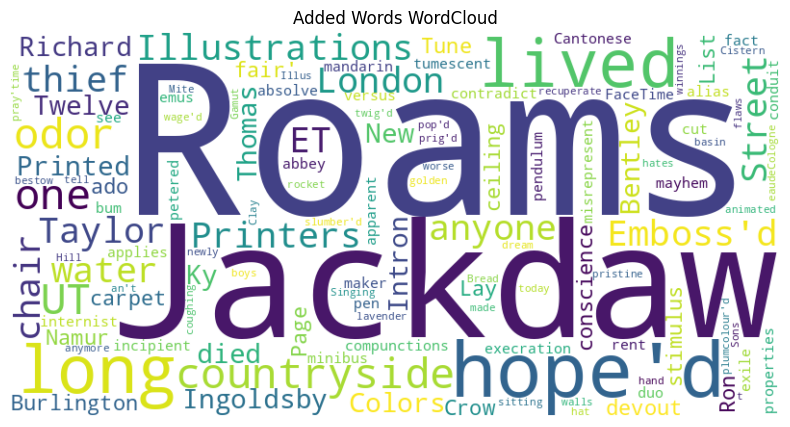

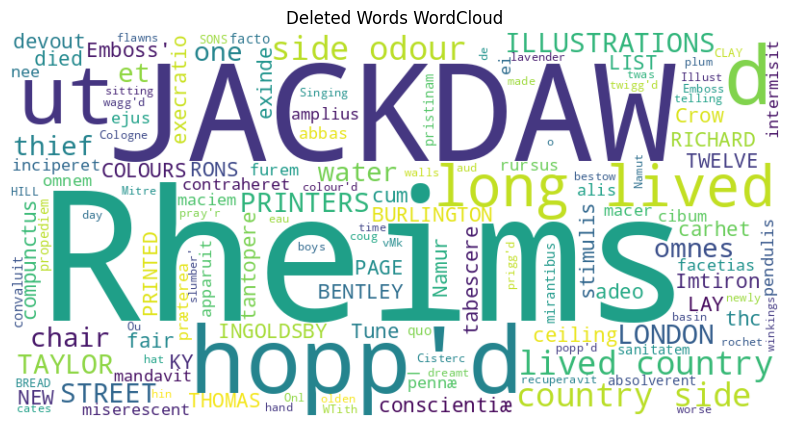

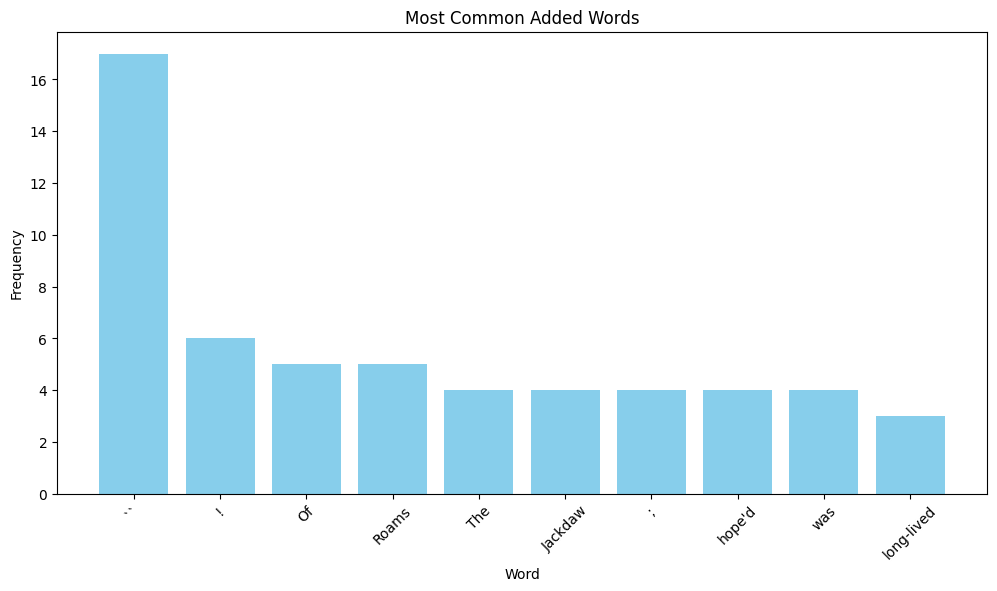

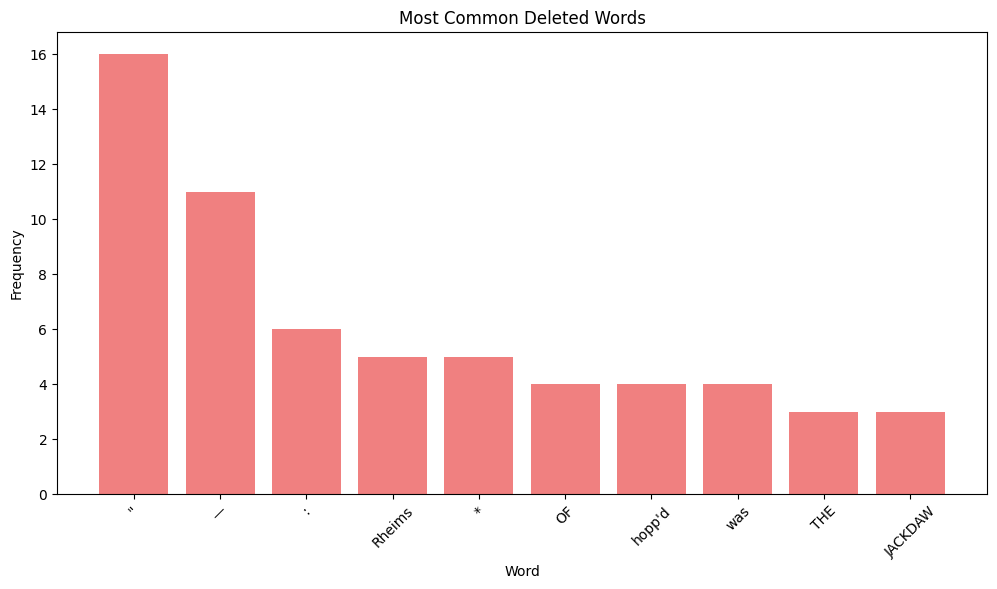

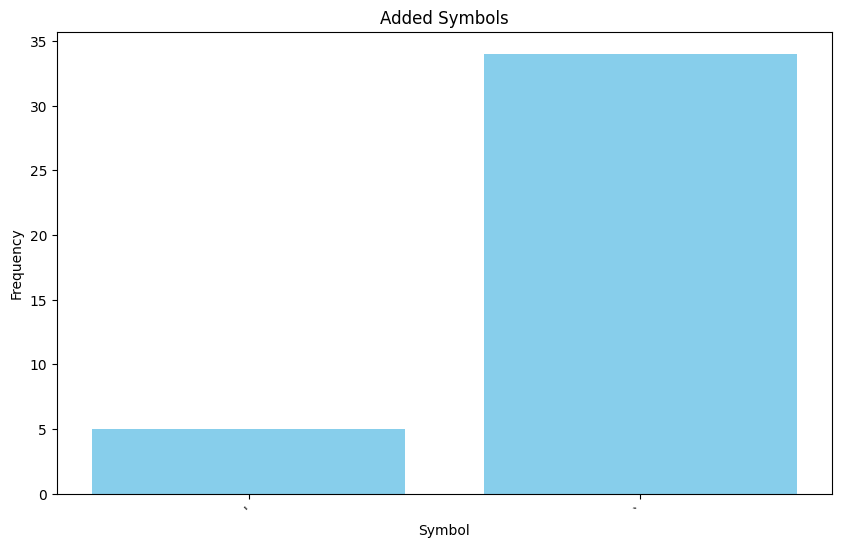

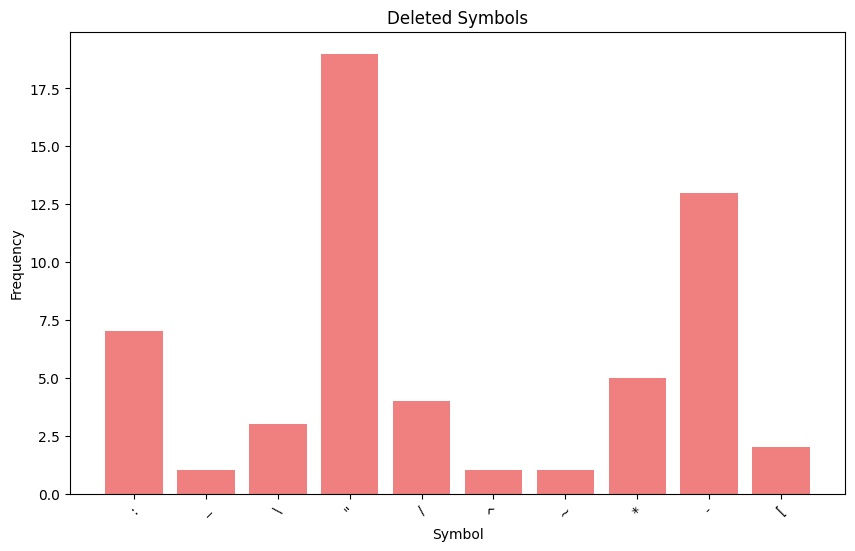

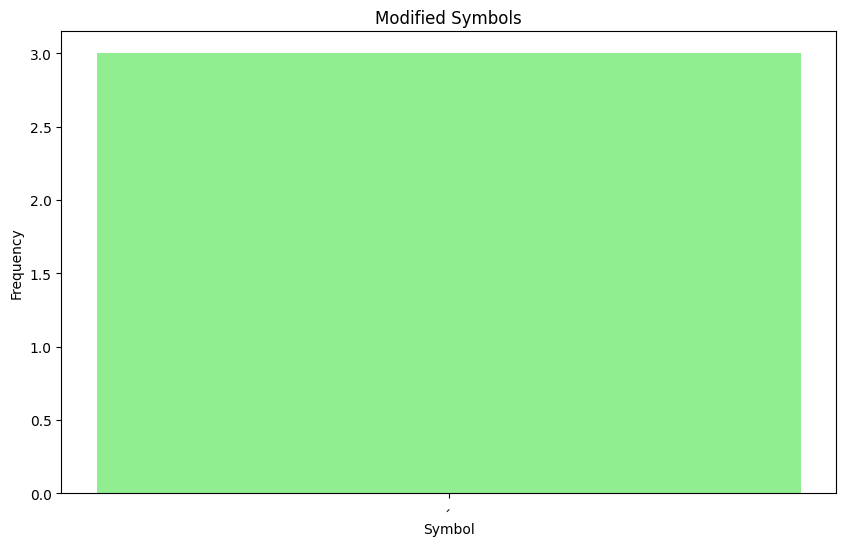

Added Word Count: 224
Deleted Word Count: 250
Added Word Frequencies: Counter({'``': 17, '!': 6, 'Of': 5, 'Roams': 5, 'The': 4, 'Jackdaw': 4, ';': 4, "hope'd": 4, 'was': 4, 'long-lived': 3, 'countryside,': 3, 'odor': 3, '?': 3, "'": 3, 'UT': 3, '.': 2, 'Roams.': 2, 'With': 2, 'London': 2, 'And': 2, 'Taylor,': 2, '3': 2, "Emboss'd": 2, 'thief': 2, 'ones': 2, 'ET': 2, "''": 2, 'chair': 2, 'water,': 2, 'anyone': 2, 'Roams,': 1, 'I': 1, 'died.': 1, 'Ky': 1, 'Thomas': 1, 'Ingoldsby.': 1, 'Twelve': 1, 'Illustrations,': 1, 'Printed': 1, 'In': 1, 'Colors.': 1, 'Intron': 1, 'Richard': 1, 'Bentley,': 1, 'New': 1, 'Burlington': 1, 'Street.': 1, 'Lay,': 1, "Ron's,": 1, 'Printers.': 1, 'List': 1, 'Illustrations.': 1, 'Page': 1, 'about': 1, "fair'": 1, 'Namur.': 1, '7': 1, 'carpet,': 1, 'ceiling.': 1, 'devout': 1, 'the': 1, 'Crow.': 1, 'Tune': 1, 'ado': 1, 'conscience': 1, 'stimulus': 1, 'compunctions': 1, 'execration': 1, 'cut': 1, 'Cantonese': 1, 'exile': 1, 'tumescent': 1, 'incipient,': 1, 'mayhe

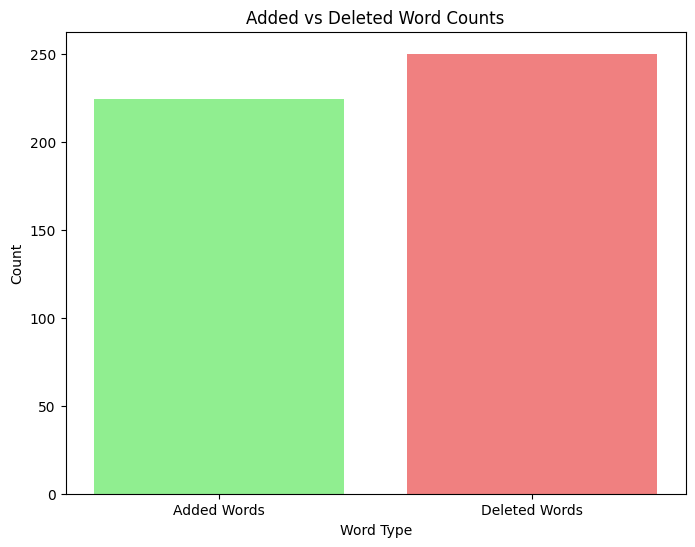

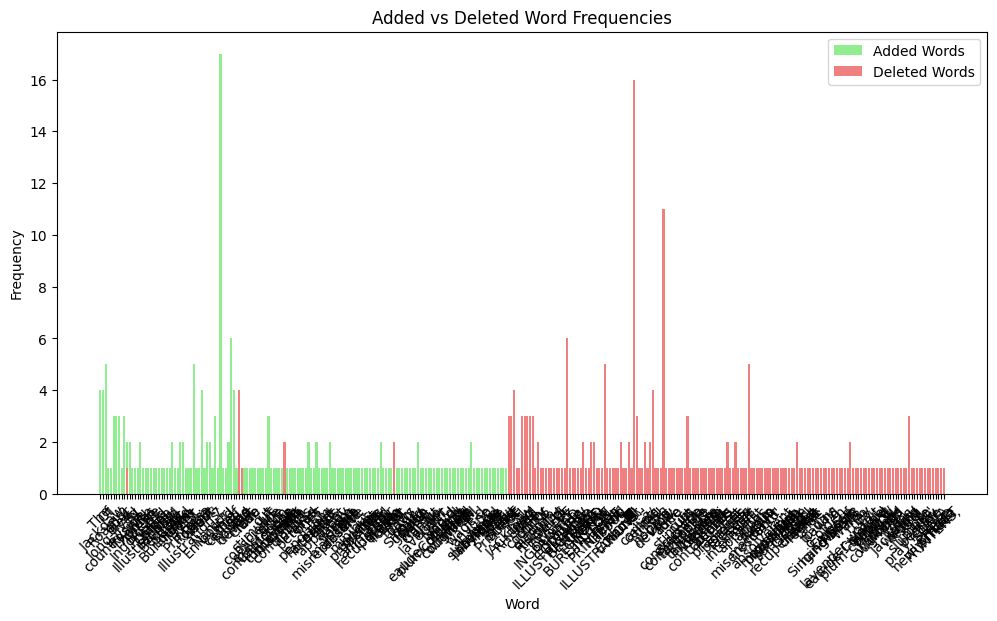

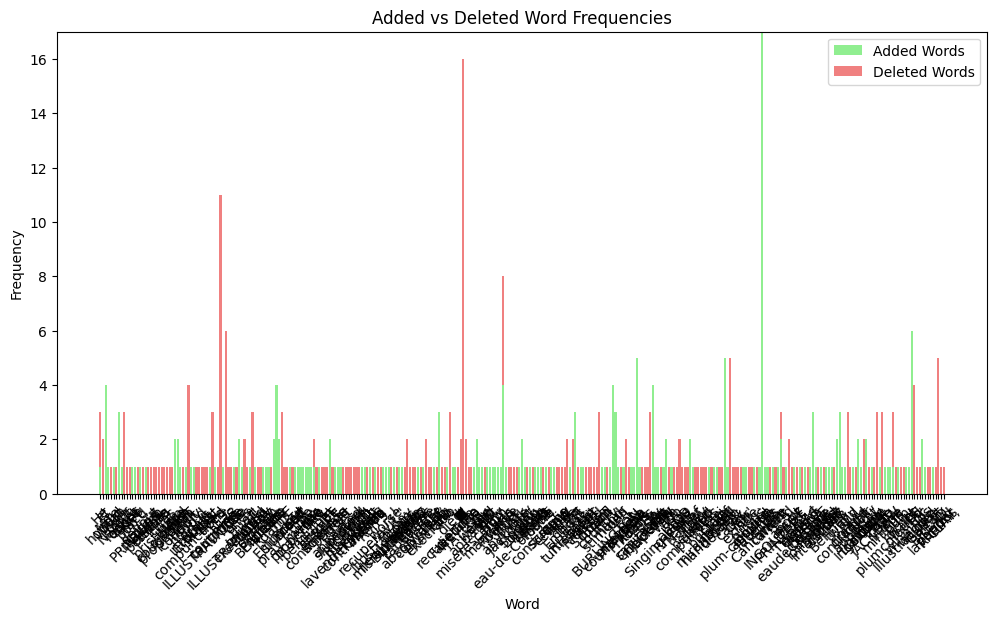

[('000200036_01_text_comparison_report.csv', 32, -26, 26), ('011834197_01_text_comparison_report.csv', 62, -176, 176)]
Overall Accuracy: 90.49%


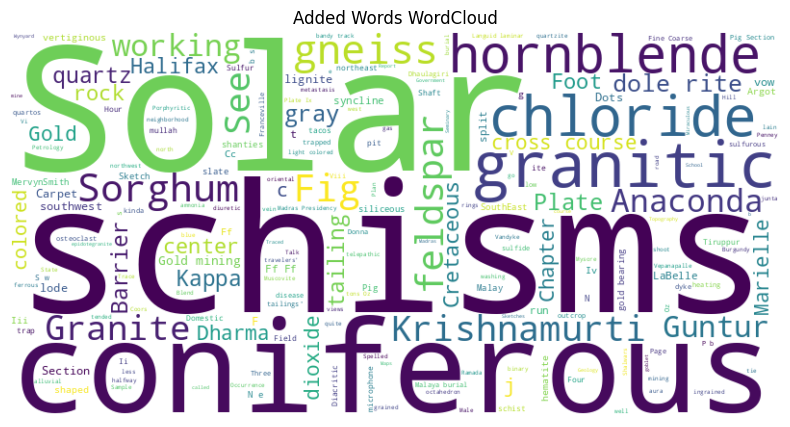

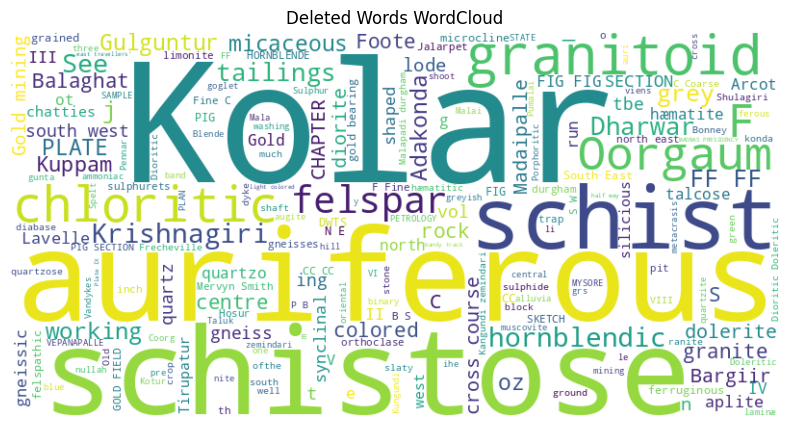

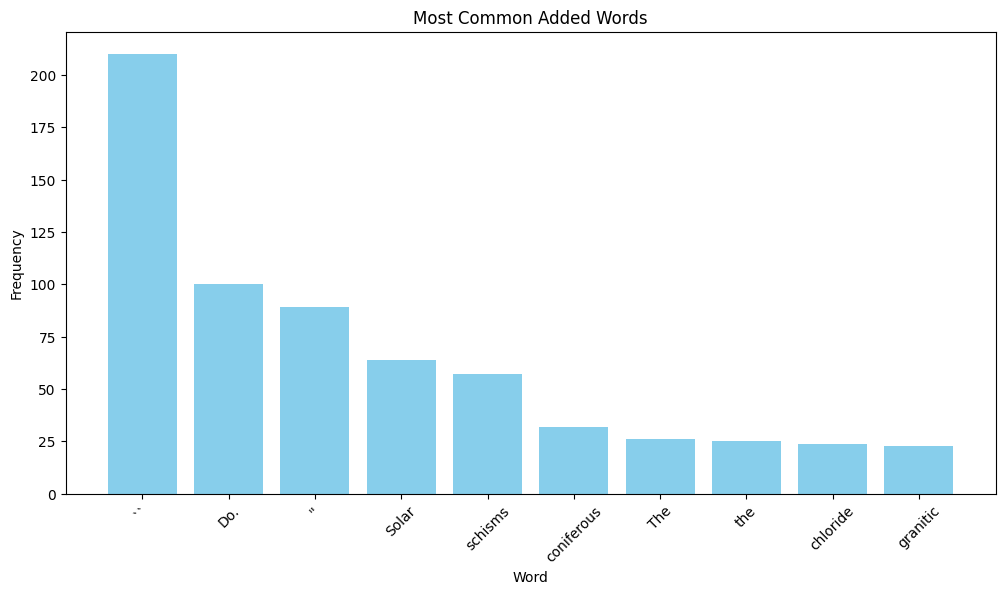

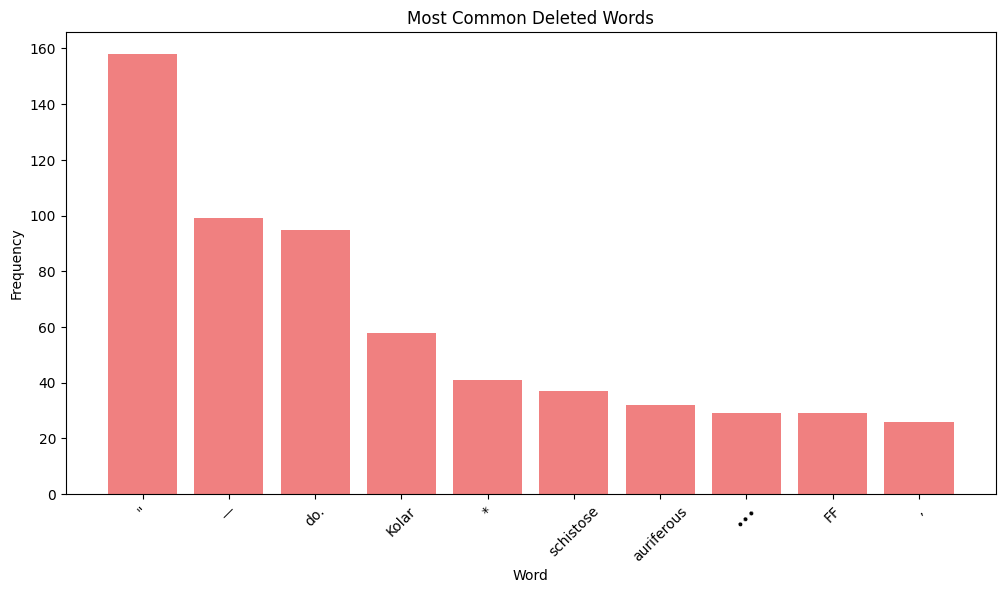

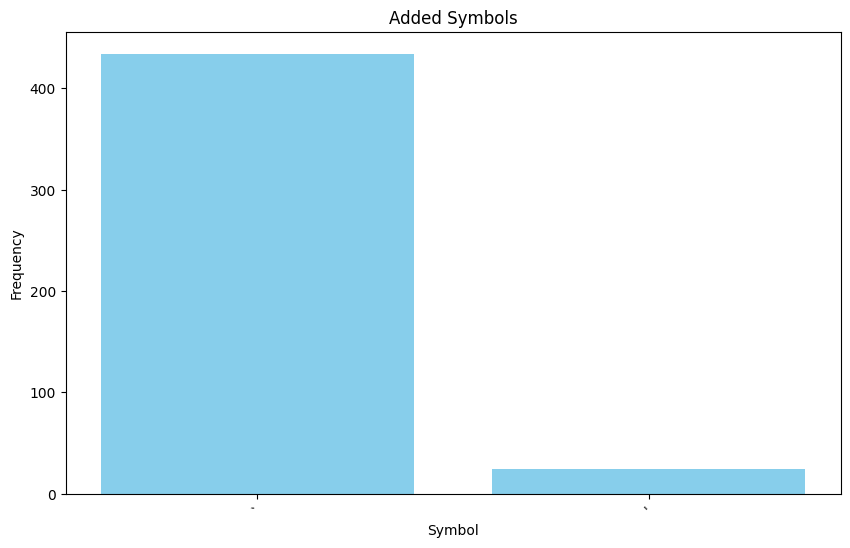

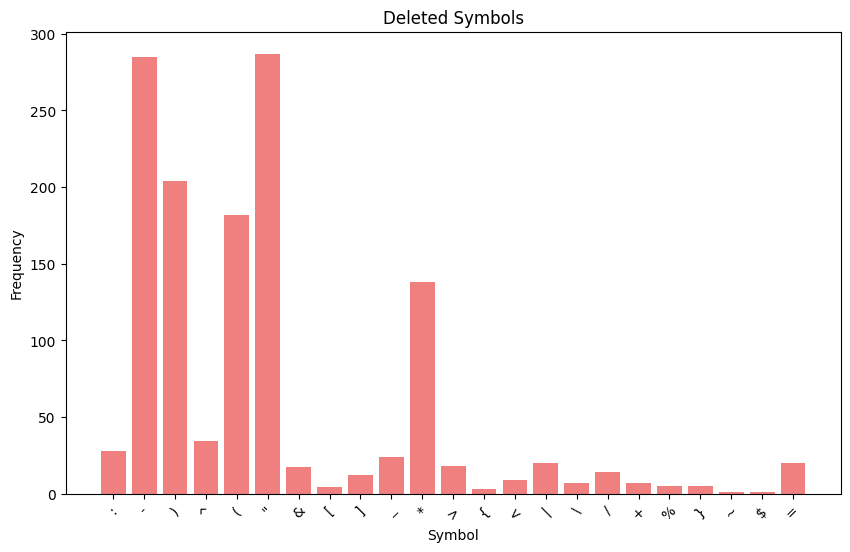

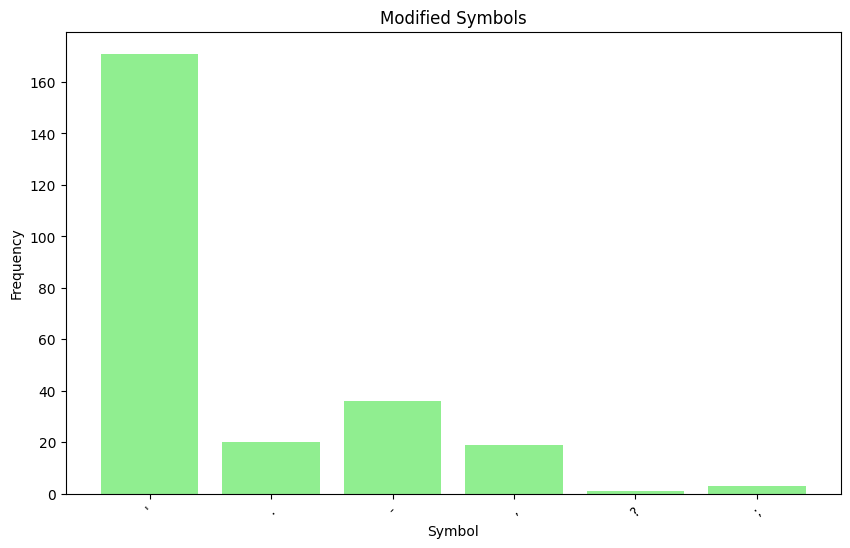

Added Word Count: 3583
Deleted Word Count: 3759
Added Word Frequencies: Counter({'``': 210, 'Do.': 100, "''": 89, 'Solar': 64, 'schisms': 57, 'coniferous': 32, 'The': 26, 'the': 25, 'chloride': 24, 'granitic': 23, 'Ff': 21, 'Sorghum': 19, '2': 18, ';': 18, 'hornblende': 17, 'Of': 16, '1': 16, 'Gold': 15, ',': 15, '.': 15, 'to': 15, 'See': 15, 'dole': 14, 'gray': 14, 'Coniferous': 13, 'schisms,': 13, 'Krishnamurti': 12, 'cross': 12, 'rite': 12, 'Anaconda': 12, 'Cretaceous': 12, 'And': 11, 'From': 11, 'Chapter': 11, '...': 11, 'Guntur': 11, 'center': 11, 'colored': 11, '3': 11, 'gneiss': 10, 'feldspar': 10, 'Halifax': 10, '?': 10, 'gold': 10, 'Pig.': 10, 'Fig.': 10, 'mining': 10, 'Kappa': 9, 'of.': 9, 'Dharma': 9, 'Very': 9, 'Do': 9, 'In': 8, 'To': 8, 'Carpet': 8, 'split': 8, 'dioxide': 8, 'Marielle': 8, 'in': 8, 'an': 8, 'southwest': 8, 'not': 8, 'vow.': 8, 'syncline': 8, 'and': 8, '15': 8, '!': 8, 'tailing': 8, 'Foot': 7, 'can': 7, 'Through': 7, 'Figs.': 7, 'Cc': 7, 'Do,': 7, 'a': 6, '

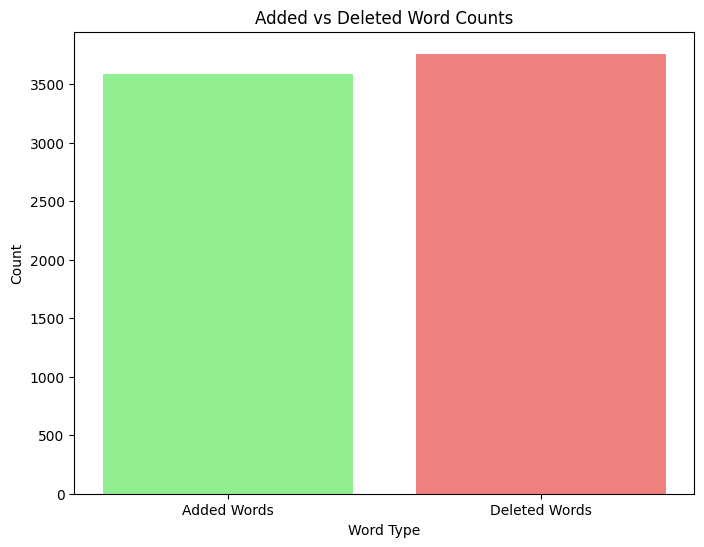

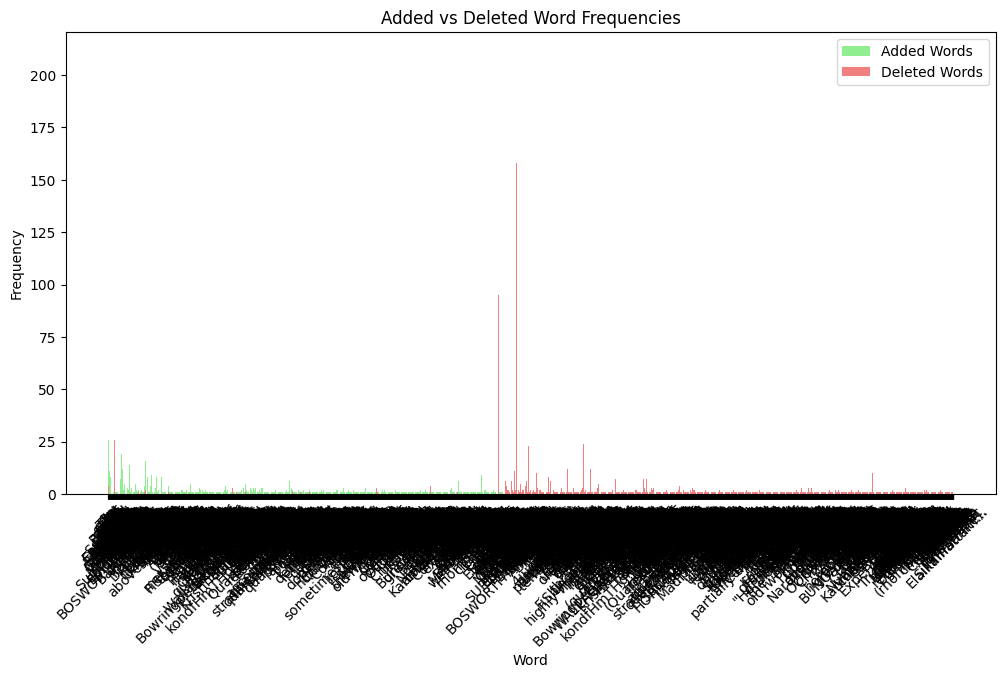

In [ ]:
comparison_folder = '/content/comparsion'
csv_files = glob(os.path.join(comparison_folder, '*.csv'))

all_statistics = []
for file in csv_files:
    df = load_csv_data(file)
    stats = calculate_modifications(df)
    added, deleted, modified = symbol_analysis_combined(df)
    all_statistics.append((os.path.basename(file),) + stats)
    print(all_statistics)

    overall_accuracy = calculate_accuracy_df(df)
    print(f"Overall Accuracy: {overall_accuracy:.2%}")
    changes = compare_texts(df)
    visualize_changes(changes)
    added_symbols, deleted_symbols, modified_symbols = symbol_analysis_combined(df)
    visualize_symbol_analysis(added_symbols, deleted_symbols, modified_symbols)
    added_word_count, deleted_word_count, added_word_freq, deleted_word_freq = calculate_text_statistics(changes)
    print("Added Word Count:", added_word_count)
    print("Deleted Word Count:", deleted_word_count)
    print("Added Word Frequencies:", added_word_freq)
    print("Deleted Word Frequencies:", deleted_word_freq)
    visualize_word_counts(added_word_count, deleted_word_count)
    visualize_word_frequencies(added_word_freq, deleted_word_freq)
    visualize_word_comparison(added_word_freq, deleted_word_freq)

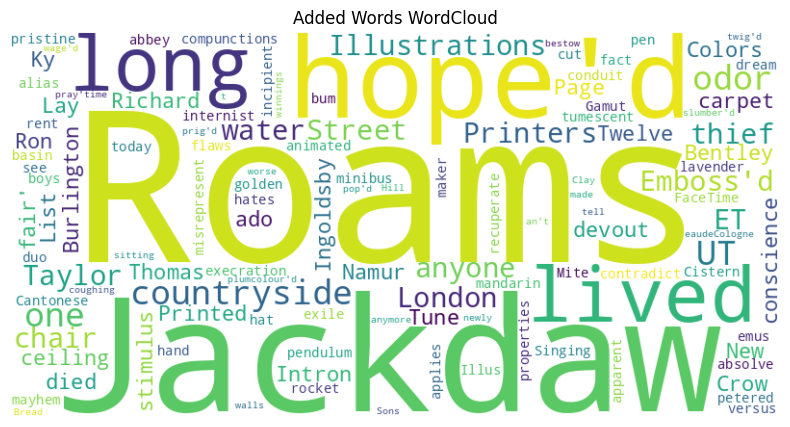

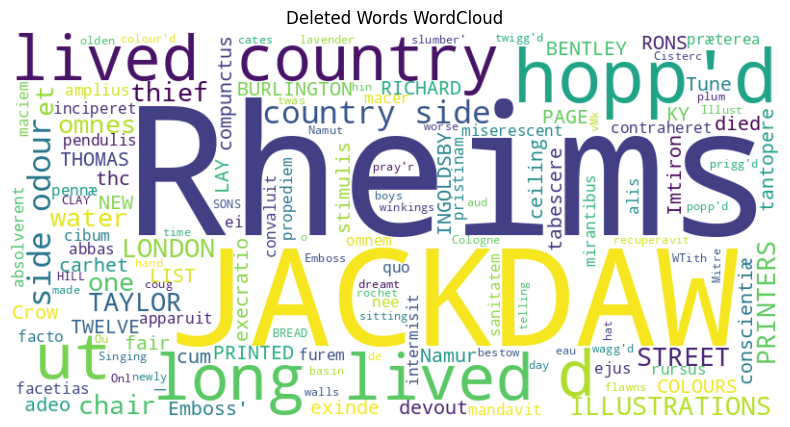

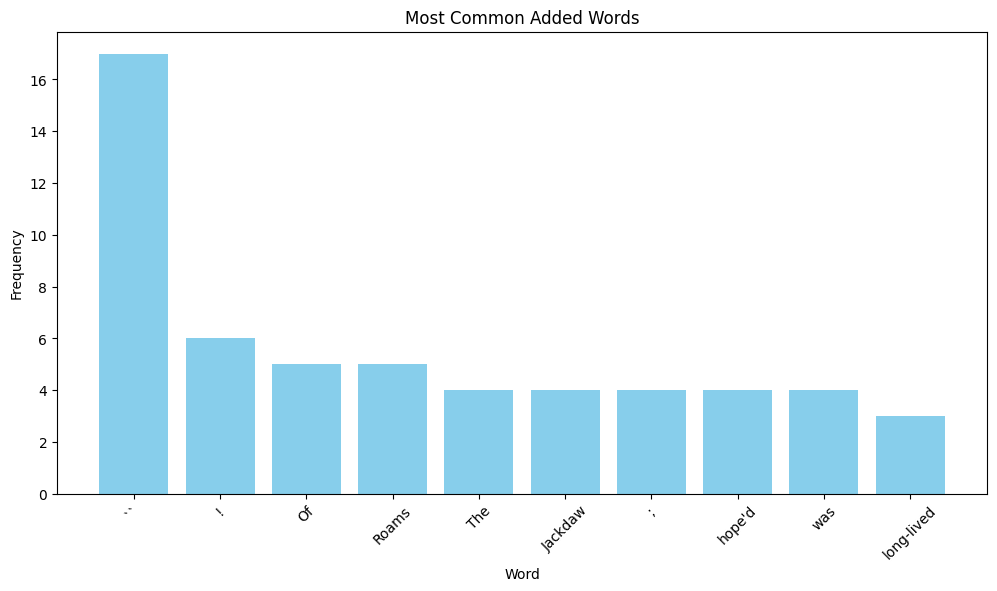

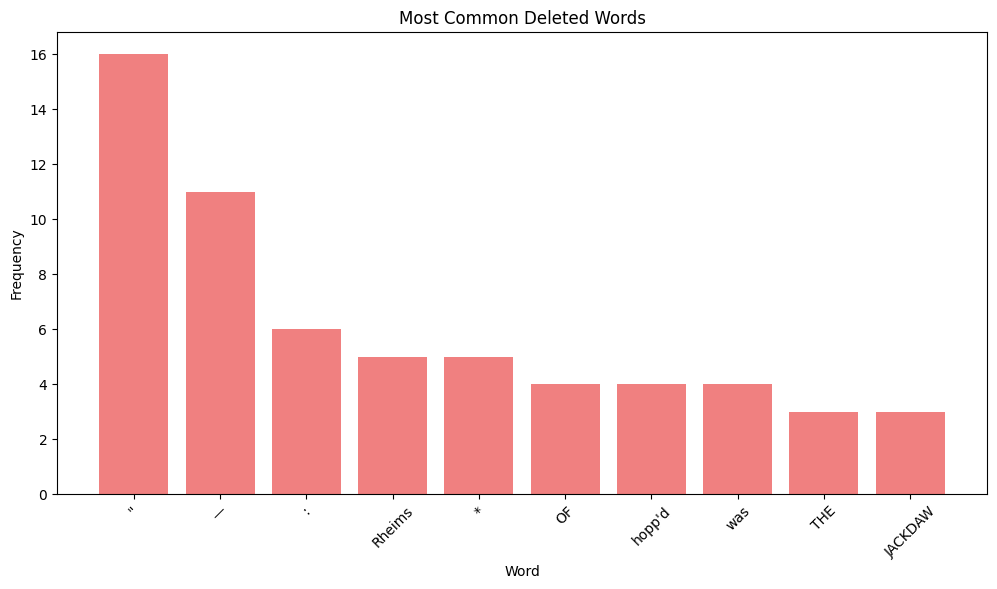

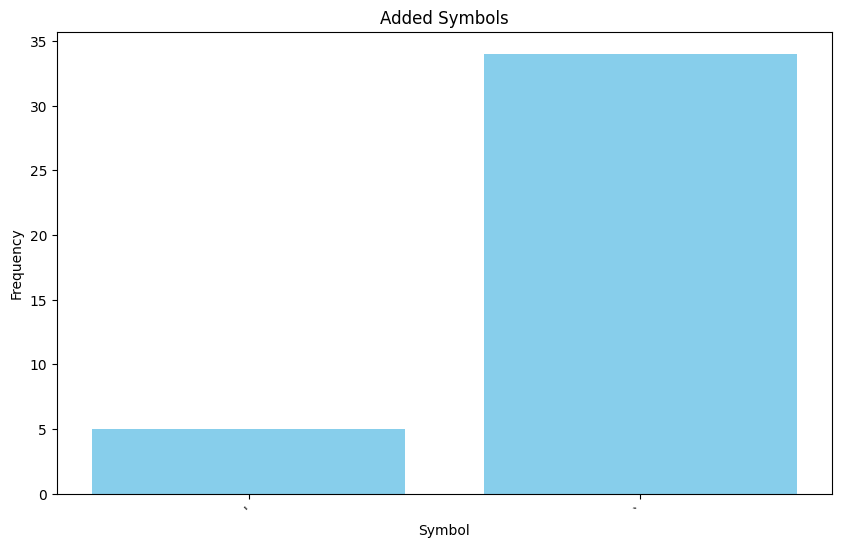

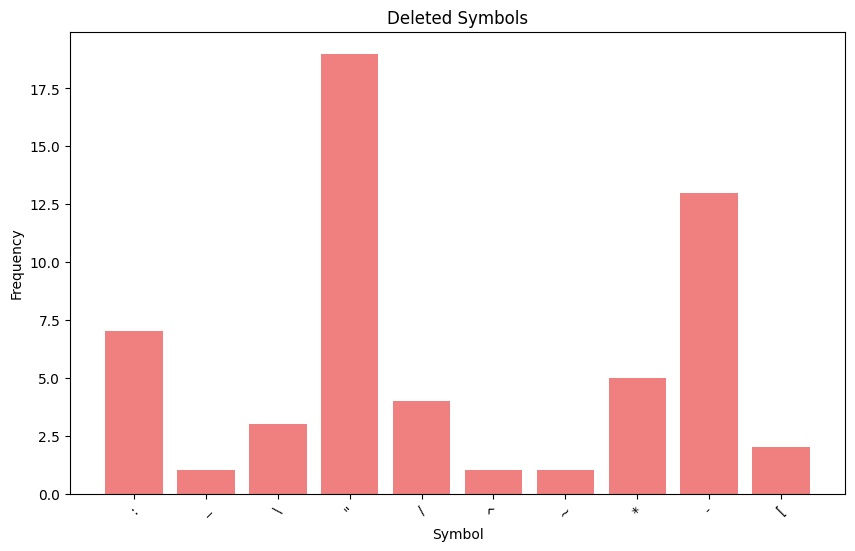

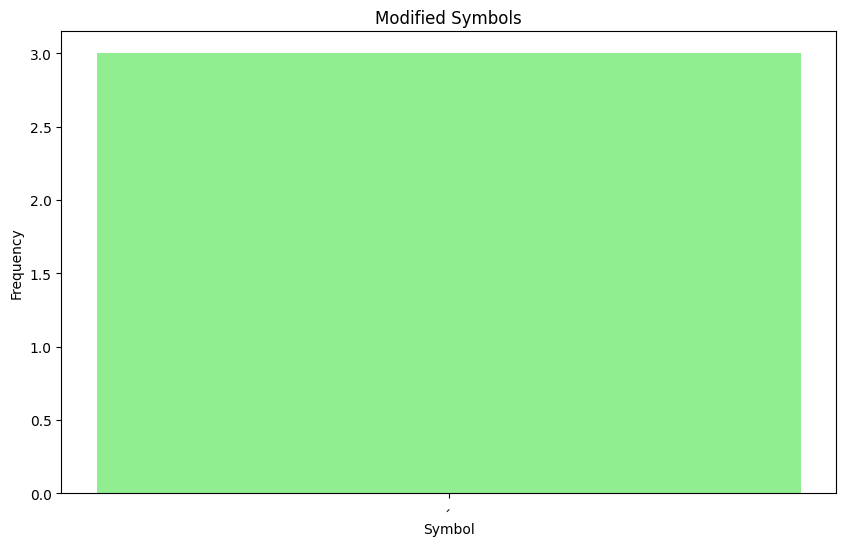

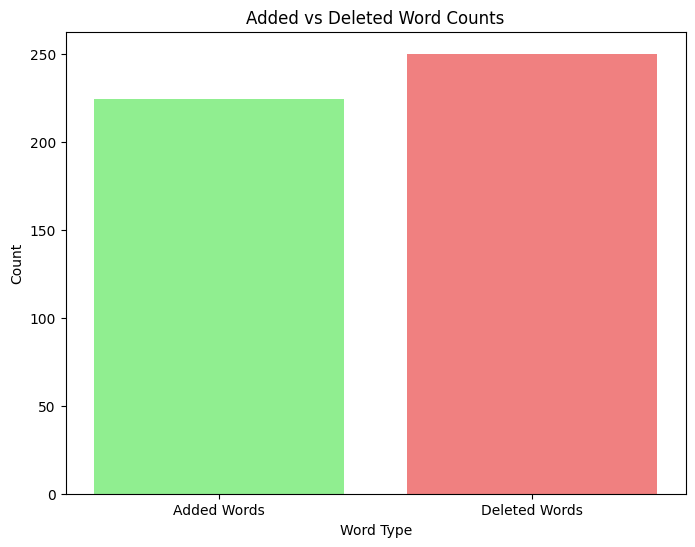

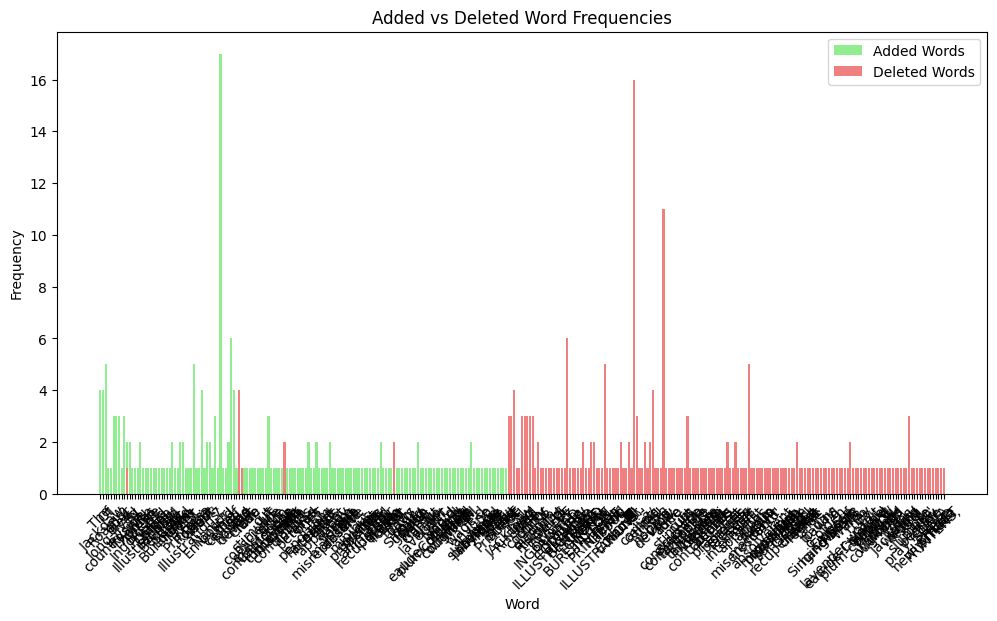

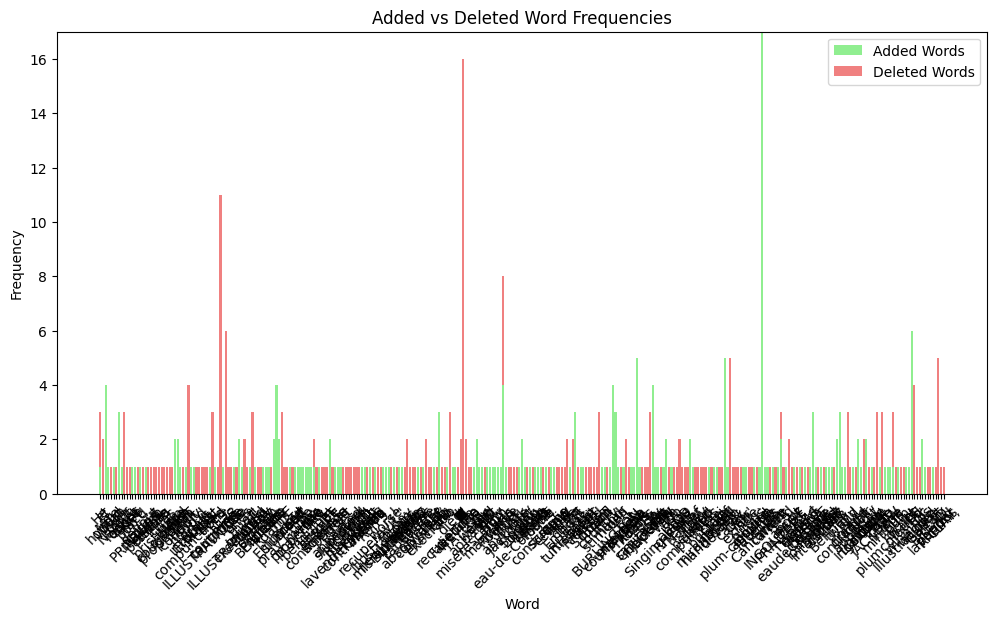

('000200036_01_text_comparison_report.csv', (32, -26, 26), 0.889055905307124)


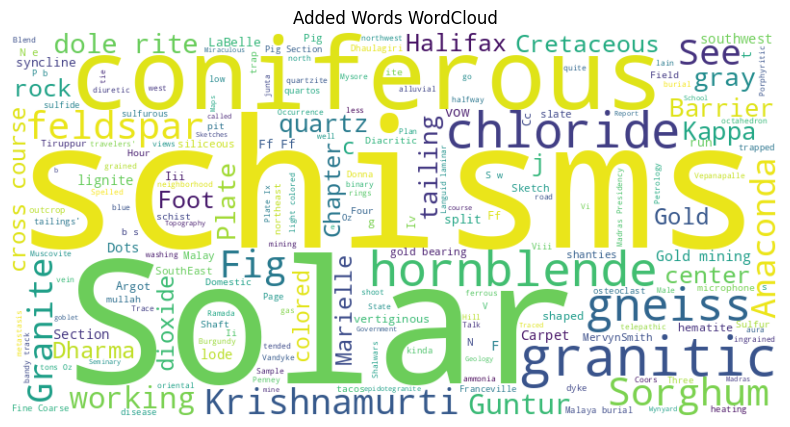

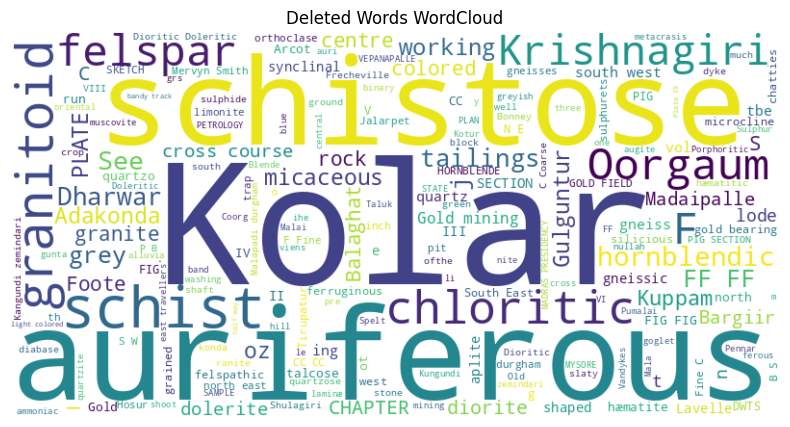

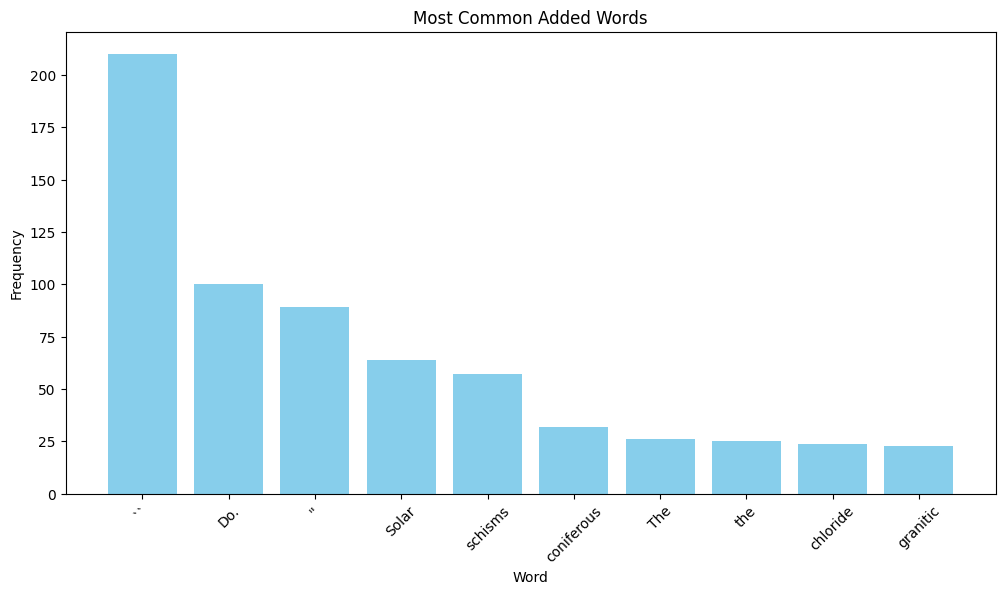

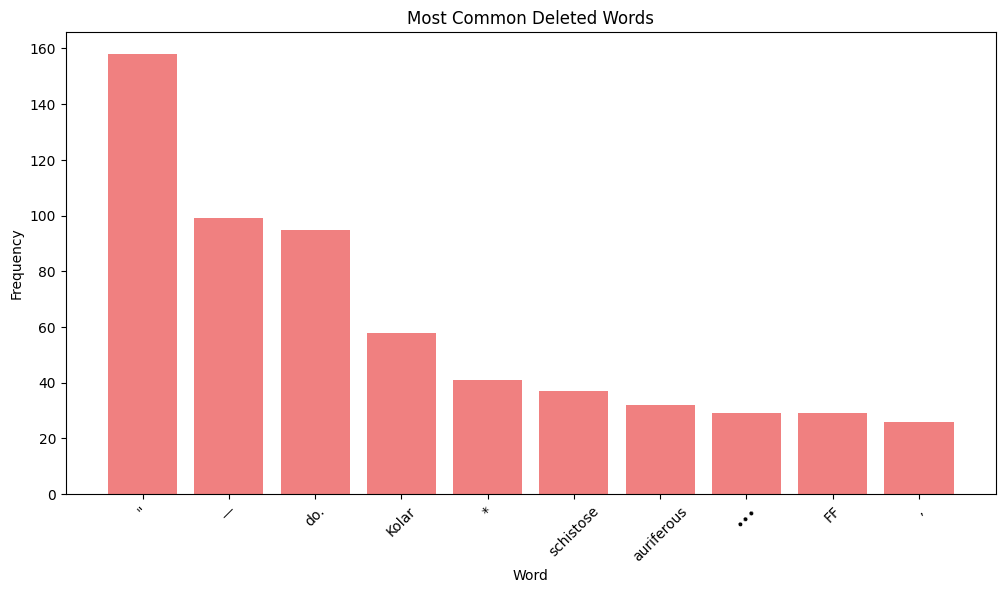

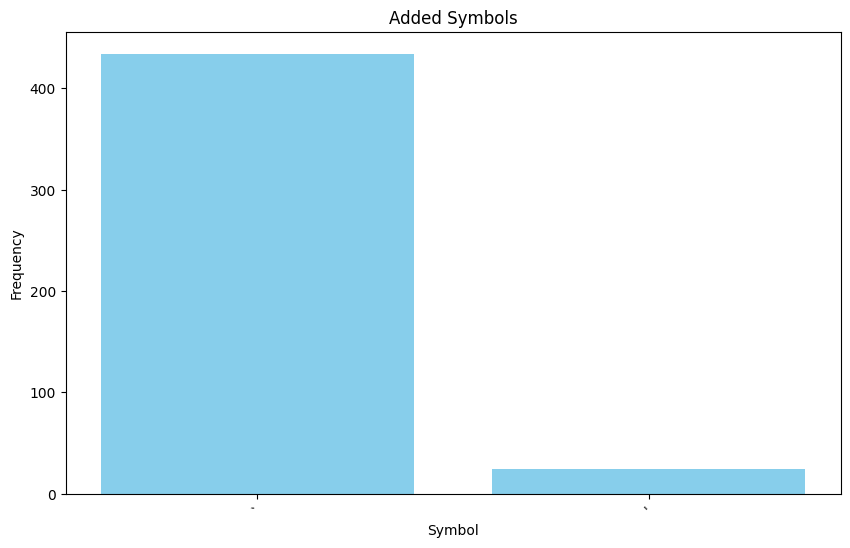

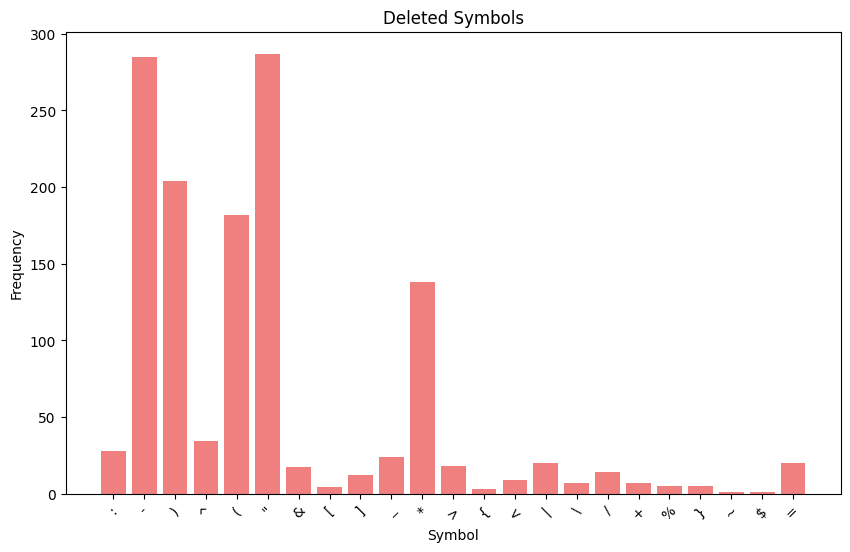

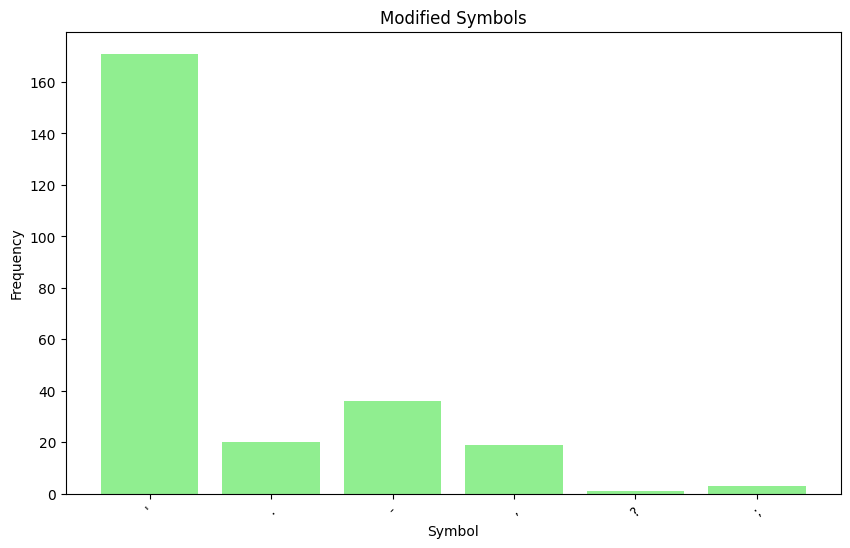

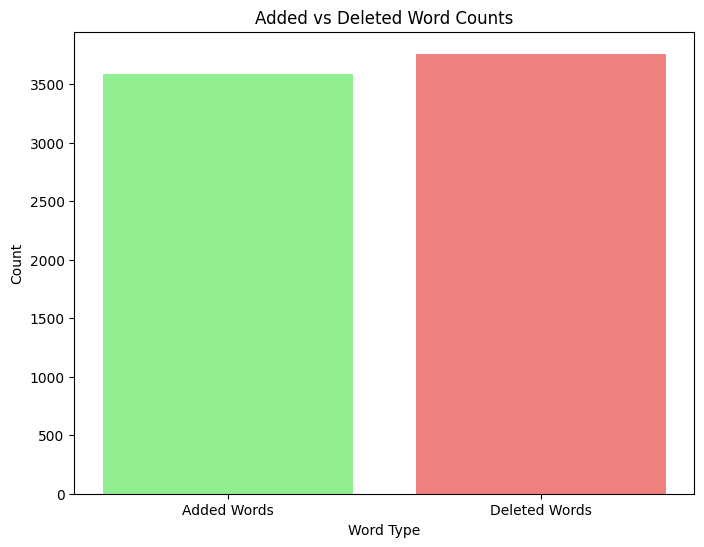

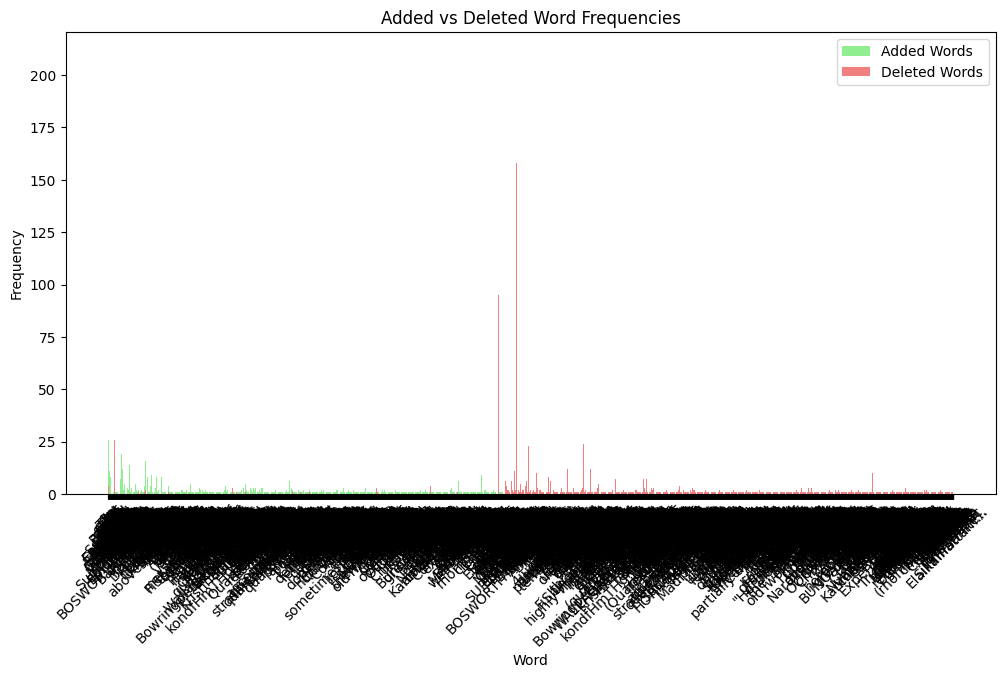

KeyboardInterrupt: 

In [58]:
import os
from glob import glob

def process_file(file):
    df = load_csv_data(file)
    stats = calculate_modifications(df)
    overall_accuracy = calculate_accuracy_df(df)
    changes = compare_texts(df)
    visualize_changes(changes)
    added_symbols, deleted_symbols, modified_symbols = symbol_analysis_combined(df)
    visualize_symbol_analysis(added_symbols, deleted_symbols, modified_symbols)
    added_word_count, deleted_word_count, added_word_freq, deleted_word_freq = calculate_text_statistics(changes)
    visualize_word_counts(added_word_count, deleted_word_count)
    visualize_word_frequencies(added_word_freq, deleted_word_freq)
    visualize_word_comparison(added_word_freq, deleted_word_freq)
    return (os.path.basename(file), stats, overall_accuracy)

comparison_folder = '/content/comparsion'
csv_files = glob(os.path.join(comparison_folder, '*.csv'))

all_statistics = []
for file in csv_files:
    file_statistics = process_file(file)
    all_statistics.append(file_statistics)
    print(file_statistics)
